In [8]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from pylab import rcParams
from PIL import Image, ImageDraw
rcParams['figure.figsize'] = 5.01, 5.15

# Here is a script for generating protoptype shapes (experiment 1) 
# and then adding noise to produce other shapes with category resemblance.

# N.B. We only selected shapes that generated without any intersecting lines (which can take a few runs to achieve).

# notes on how noise is generated within np.random.normal (applied to every 5th coord):
# The normal part is specifying the distribution to select the random number from (normal distribution)
# By default the distribution is centred about 0 and we don't change that so it applies here.
# Then scale is the SD applied to the distribution, from which the numbers can be drawn (so naturally, bigger scale = bigger SD = bigger number - moving away from 0 - with which to perturb a coord).


In [9]:
#Coords for prototype A
pts_A = np.array(
    [[ 6.55525 ,  2.55472 ],
   [ 6.17284 ,  2.802609],
   [ 5.53946 ,  2.649209],
   [ 4.93053 ,  2.444444],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2.64013 ,  2.4375  ],
   [ 2.275444,  2.653124],
   [ 2.137945,  3.26562 ],
   [ 2.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  8 ],
   [ 3.32448 ,  8.353 ],
   [ 3.31582 ,  5.68866 ],
   [ 4.33527 ,  5.33862 ],
   [ 3.95968 ,  5.61967 ],
   [ 3.56366 ,  5.73976 ],
   [ 3.78818 ,  6.55292 ],
   [ 4.27712 ,  6.8283  ],
   [ 4.89532 ,  6.78615 ],
   [ 5.35334 ,  6.72433 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 5.34086 ,  3.43394 ],
   [ 5.76392 ,  3.55156 ],
   [ 7.37056 ,  3.8778  ],
    [ 7.53116 ,  2.47228 ],
   [ 7.53116 ,  2.47228 ]])

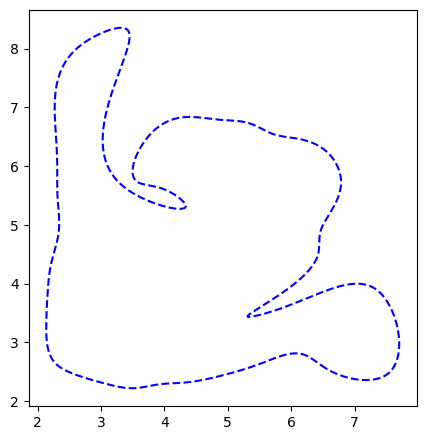

In [10]:
#print prototype A
#generate splines
tck, u = splprep(pts_A.T, s=0.0, per=3) # s-parameter controls roundness 

#interpolate
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)


#plt.plot(pts[:,0], pts[:,1], 'ro') #uncomment to show points
plt.plot(x_new, y_new, 'b--')
plt.show()

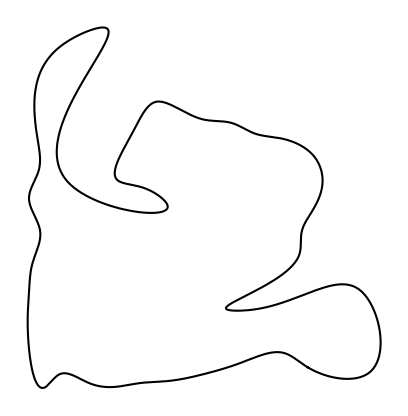

In [11]:
# category A - Add low level of disortion

#reset coords each time you run this cell
pts_A = np.array([[ 6.55525 ,  2.55472 ],
   [ 6.17284 ,  2.802609],
   [ 5.53946 ,  2.649209],
   [ 4.93053 ,  2.444444],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2.64013 ,  2.4375  ],
   [ 2.275444,  2.653124],
   [ 2.137945,  3.26562 ],
   [ 2.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  8 ],
   [ 3.32448 ,  8.353 ],
   [ 3.31582 ,  5.68866 ],
   [ 4.33527 ,  5.33862 ],
   [ 3.95968 ,  5.61967 ],
   [ 3.56366 ,  5.73976 ],
   [ 3.78818 ,  6.55292 ],
   [ 4.27712 ,  6.8283  ],
   [ 4.89532 ,  6.78615 ],
   [ 5.35334 ,  6.72433 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 5.34086 ,  3.43394 ],
   [ 5.76392 ,  3.55156 ],
   [ 7.37056 ,  3.8778  ],
    [ 7.53116 ,  2.47228 ],
   [ 7.53116 ,  2.47228 ]])

#include some random Gaussian noise 
#the Gaussian noise is added at 3 different levels (i.e., low, medium, high distortion)
#so if you like a shape and want to use it, also record the 'scale=' used to generate it!
countx=0
for x in np.nditer(pts_A[:,0], op_flags=['readwrite']):
    countx+=1
    if countx % 5==0: #add noise every 5 points
        x[...]+=np.random.normal(scale=.25)
    else:
        x=x
    #print(x)

county=0
for y in np.nditer(pts_A[:,1], op_flags=['readwrite']):
    county+=1
    if county % 5==0: #add noise every 5 points
        y[...]+=np.random.normal(scale=.25)
    else:
        y=y
    #print(y)

#generate splines
tck, u = splprep(pts_A.T, s=0, per=3) # s-parameter controls roundness 

#interpolate
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

#plt.plot(pts[:,0], pts[:,1], 'ro') #uncomment to show points
plt.plot(x_new, y_new, 'black')
plt.axis('off')

#saves to same cd as file so saving to desktop atm!
#make sure you change .png name so as not to overwrite good shapes!
fig1 = plt.gcf()
fig1.savefig('A_xx.png', dpi=98, bbox_inches='tight')
plt.show()

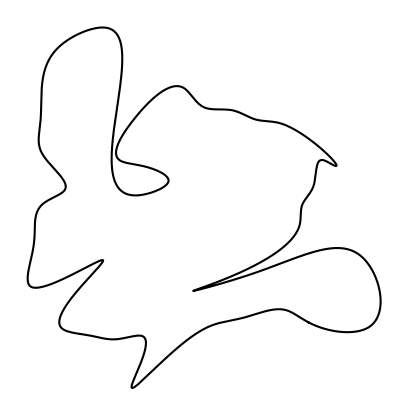

In [12]:
# category A - Add medium level of disortion

#reset coords each time you run this cell
pts_A = np.array([[ 6.55525 ,  2.55472 ],
   [ 6.17284 ,  2.802609],
   [ 5.53946 ,  2.649209],
   [ 4.93053 ,  2.444444],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2.64013 ,  2.4375  ],
   [ 2.275444,  2.653124],
   [ 2.137945,  3.26562 ],
   [ 2.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  8 ],
   [ 3.32448 ,  8.353 ],
   [ 3.31582 ,  5.68866 ],
   [ 4.33527 ,  5.33862 ],
   [ 3.95968 ,  5.61967 ],
   [ 3.56366 ,  5.73976 ],
   [ 3.78818 ,  6.55292 ],
   [ 4.27712 ,  6.8283  ],
   [ 4.89532 ,  6.78615 ],
   [ 5.35334 ,  6.72433 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 5.34086 ,  3.43394 ],
   [ 5.76392 ,  3.55156 ],
   [ 7.37056 ,  3.8778  ],
    [ 7.53116 ,  2.47228 ],
   [ 7.53116 ,  2.47228 ]])

countx=0
for x in np.nditer(pts_A[:,0], op_flags=['readwrite']):
    countx+=1
    if countx % 5==0:
        x[...]+=np.random.normal(scale=.55)
    else:
        x=x

county=0
for y in np.nditer(pts_A[:,1], op_flags=['readwrite']):
    county+=1
    if county % 5==0:
        y[...]+=np.random.normal(scale=.55)
    else:
        y=y

tck, u = splprep(pts_A.T, s=0, per=3) # s-parameter controls roundness 

#interpolate
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

plt.plot(x_new, y_new, 'black')
plt.axis('off')

fig1 = plt.gcf()
fig1.savefig('A_xx.png', dpi=98, bbox_inches='tight')
plt.show()

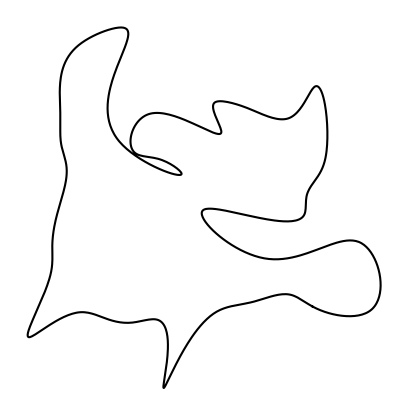

In [17]:
# category A - Add high level of disortion

#reset coords each time you run this cell
pts_A = np.array([[ 6.55525 ,  2.55472 ],
   [ 6.17284 ,  2.802609],
   [ 5.53946 ,  2.649209],
   [ 4.93053 ,  2.444444],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2.64013 ,  2.4375  ],
   [ 2.275444,  2.653124],
   [ 2.137945,  3.26562 ],
   [ 2.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  8 ],
   [ 3.32448 ,  8.353 ],
   [ 3.31582 ,  5.68866 ],
   [ 4.33527 ,  5.33862 ],
   [ 3.95968 ,  5.61967 ],
   [ 3.56366 ,  5.73976 ],
   [ 3.78818 ,  6.55292 ],
   [ 4.27712 ,  6.8283  ],
   [ 4.89532 ,  6.78615 ],
   [ 5.35334 ,  6.72433 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 5.34086 ,  3.43394 ],
   [ 5.76392 ,  3.55156 ],
   [ 7.37056 ,  3.8778  ],
    [ 7.53116 ,  2.47228 ],
   [ 7.53116 ,  2.47228 ]])

countx=0
for x in np.nditer(pts_A[:,0], op_flags=['readwrite']):
    countx+=1
    if countx % 5==0:
        x[...]+=np.random.normal(scale=.75)
    else:
        x=x

county=0
for y in np.nditer(pts_A[:,1], op_flags=['readwrite']):
    county+=1
    if county % 5==0:
        y[...]+=np.random.normal(scale=.75)
    else:
        y=y

tck, u = splprep(pts_A.T, s=0, per=3) # s-parameter controls roundness 

#interpolate
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

plt.plot(x_new, y_new, 'black')
plt.axis('off')

fig1 = plt.gcf()
fig1.savefig('A_xx.png', dpi=98, bbox_inches='tight')
plt.show()

In [18]:
#Coords for prototype B
pts_B = np.array([[ 5.55525 ,  3.05472 ],
   [ 5.17284 ,  2.802609],
   [ 7 ,  0.7],
    [ 5 ,  0.25],
   [ 4 ,  0.7],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2 ,  2  ],
   [ 1.275444,  1],
    [-0.475444,  1],
    [-0.6,  1],
    [-0.7,  3],
   [ 1.137945,  3.26562 ],
   [ 3.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  6.75021 ],
   [ 3.32448 ,  7.353 ],
   [ 3.31582 ,  7.7 ],
   [ 3.35159 ,  8 ],
   [ 3.78818 ,  8 ],
   [ 4.27712 ,  8.2 ],
   [ 4.89532 ,  8.5 ],
   [ 5.35334 ,  8 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.47649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 6.43586 ,  4.46519 ],
   [ 5.44711 ,  4.26519 ]])

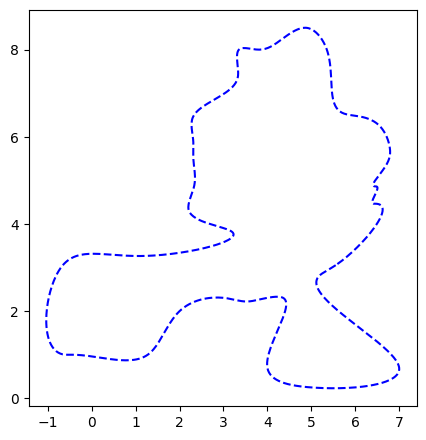

In [19]:
#print prototype B
#generate splines
tck, u = splprep(pts_B.T, s=0.0, per=3) # s-parameter controls roundness 

#interpolate
u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)


#plt.plot(pts[:,0], pts[:,1], 'ro') #uncomment to show points
plt.plot(x_new, y_new, 'b--')
plt.show()

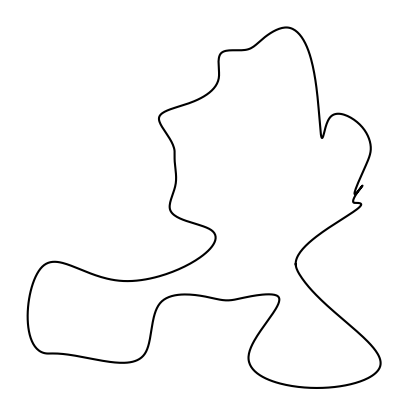

In [20]:
# category B - add low level of distortion

#reset coords each time you run this cell
pts_B = np.array([[ 5.55525 ,  3.05472 ],
   [ 5.17284 ,  2.802609],
   [ 7 ,  0.7],
    [ 5 ,  0.25],
   [ 4 ,  0.7],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2 ,  2  ],
   [ 1.275444,  1],
    [-0.475444,  1],
    [-0.6,  1],
    [-0.7,  3],
   [ 1.137945,  3.26562 ],
   [ 3.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  6.75021 ],
   [ 3.32448 ,  7.353 ],
   [ 3.31582 ,  7.7 ],
   [ 3.35159 ,  8 ],
   [ 3.78818 ,  8 ],
   [ 4.27712 ,  8.2 ],
   [ 4.89532 ,  8.5 ],
   [ 5.35334 ,  8 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.47649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 6.43586 ,  4.46519 ],
   [ 5.44711 ,  4.26519 ]])

for x in np.nditer(pts_B[:,0], op_flags=['readwrite']):
    countx+=1
    if countx % 5==0:
        x[...]+=np.random.normal(scale=.25)
    else:
        x=x

county=0
for y in np.nditer(pts_B[:,1], op_flags=['readwrite']):
    county+=1
    if county % 5==0:
        y[...]+=np.random.normal(scale=.25)
    else:
        y=y

tck, u = splprep(pts_B.T, s=0, per=3) # s-parameter controls roundness 

u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

plt.plot(x_new, y_new, 'black')
plt.axis('off')

fig1 = plt.gcf()
fig1.savefig('B_xx.png', dpi=98, bbox_inches='tight')
plt.show()

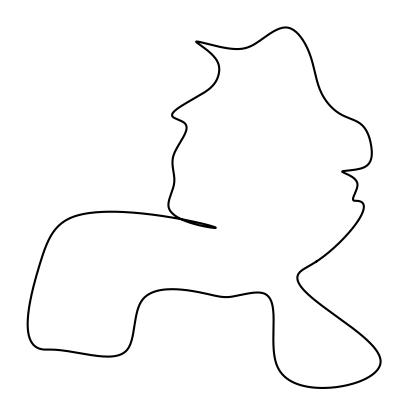

In [24]:
# category B - add medium level of distortion

#reset coords each time you run this cell
pts_B = np.array([[ 5.55525 ,  3.05472 ],
   [ 5.17284 ,  2.802609],
   [ 7 ,  0.7],
    [ 5 ,  0.25],
   [ 4 ,  0.7],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2 ,  2  ],
   [ 1.275444,  1],
    [-0.475444,  1],
    [-0.6,  1],
    [-0.7,  3],
   [ 1.137945,  3.26562 ],
   [ 3.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  6.75021 ],
   [ 3.32448 ,  7.353 ],
   [ 3.31582 ,  7.7 ],
   [ 3.35159 ,  8 ],
   [ 3.78818 ,  8 ],
   [ 4.27712 ,  8.2 ],
   [ 4.89532 ,  8.5 ],
   [ 5.35334 ,  8 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.47649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 6.43586 ,  4.46519 ],
   [ 5.44711 ,  4.26519 ]])

for x in np.nditer(pts_B[:,0], op_flags=['readwrite']):
    countx+=1
    if countx % 5==0:
        x[...]+=np.random.normal(scale=.55)
    else:
        x=x

county=0
for y in np.nditer(pts_B[:,1], op_flags=['readwrite']):
    county+=1
    if county % 5==0:
        y[...]+=np.random.normal(scale=.55)
    else:
        y=y

tck, u = splprep(pts_B.T, s=0, per=3) # s-parameter controls roundness 

u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

plt.plot(x_new, y_new, 'black')
plt.axis('off')

fig1 = plt.gcf()
fig1.savefig('B_xx.png', dpi=98, bbox_inches='tight')
plt.show()

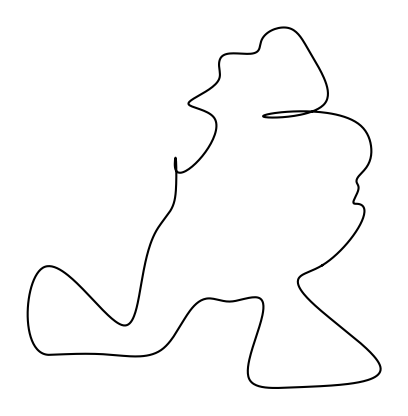

In [40]:
# category B - add high level of distortion

#reset coords each time you run this cell
pts_B = np.array([[ 5.55525 ,  3.05472 ],
   [ 5.17284 ,  2.802609],
   [ 7 ,  0.7],
    [ 5 ,  0.25],
   [ 4 ,  0.7],
   [ 4.32544 ,  2.318749],
   [ 3.90982 ,  2.2875  ],
   [ 3.51294 ,  2.221875],
   [ 3.09107 ,  2.29375 ],
   [ 2 ,  2  ],
   [ 1.275444,  1],
    [-0.475444,  1],
    [-0.6,  1],
    [-0.7,  3],
   [ 1.137945,  3.26562 ],
   [ 3.15982 ,  3.84375 ],
   [ 2.20982 ,  4.31562 ],
   [ 2.334704,  4.87873 ],
   [ 2.314264,  5.5047  ],
   [ 2.311709,  5.9135  ],
   [ 2.29638 ,  6.42961 ],
   [ 2.619374,  6.75021 ],
   [ 3.32448 ,  7.353 ],
   [ 3.31582 ,  7.7 ],
   [ 3.35159 ,  8 ],
   [ 3.78818 ,  8 ],
   [ 4.27712 ,  8.2 ],
   [ 4.89532 ,  8.5 ],
   [ 5.35334 ,  8 ],
   [ 5.71583 ,  6.54449 ],
   [ 6.13452 ,  6.46019 ],
   [ 6.54478 ,  6.26068 ],
   [ 6.7873  ,  5.74615 ],
   [ 6.64086 ,  5.25269 ],
   [ 6.45649 ,  4.86206 ],
   [ 6.47649 ,  4.86206 ],
   [ 6.41586 ,  4.46519 ],
   [ 6.43586 ,  4.46519 ],
   [ 5.44711 ,  4.26519 ]])

for x in np.nditer(pts_B[:,0], op_flags=['readwrite']):
    countx+=1
    if countx % 5==0:
        x[...]+=np.random.normal(scale=.75)
    else:
        x=x

county=0
for y in np.nditer(pts_B[:,1], op_flags=['readwrite']):
    county+=1
    if county % 5==0:
        y[...]+=np.random.normal(scale=.75)
    else:
        y=y

tck, u = splprep(pts_B.T, s=0, per=3) # s-parameter controls roundness 

u_new = np.linspace(u.min(), u.max(), 1000)
x_new, y_new = splev(u_new, tck, der=0)

plt.plot(x_new, y_new, 'black')
plt.axis('off')

fig1 = plt.gcf()
fig1.savefig('B_xx.png', dpi=98, bbox_inches='tight')
plt.show()